# Task 3

### Jim Crivello

### 02/28/23

###

## Time Series and Simple Linear Regression (from 10.16)

### a. Linear Relationships

In [492]:
import matplotlib

In [493]:
c = lambda f: 5/9 * (f-32)

In [494]:
temps = [(f, c(f)) for f in range (0, 101, 10)]

In [495]:
import pandas as pd

In [496]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

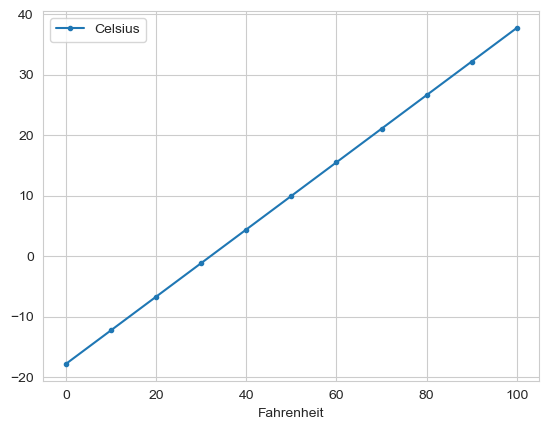

In [497]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

In [498]:
y_label = axes.set_ylabel('Celsius')

### b. Loading the Average High Temepratures into a DataFrame

In [499]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [500]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [501]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### c. Cleaning the Data

In [502]:
nyc.columns = ['Date', 'Temperature', ' Anomaly']

In [503]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [504]:
nyc.Date.dtype

dtype('int64')

In [505]:
nyc.Date = nyc.Date.floordiv(100)

In [506]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### d. Calculating Basic Descriptive Statistics for the Dataset

In [507]:
pd.set_option('display.precision',2)

In [508]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### e. Forecasting Future January Average High Temperatures

In [509]:
from scipy import stats

In [510]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [511]:
linear_regression.intercept

8.694993233674289

In [512]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [513]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

In [514]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

### f. Plotting the Average High Temperatures and a Regression Line

In [515]:
import seaborn as sns

In [516]:
sns.set_style('whitegrid')

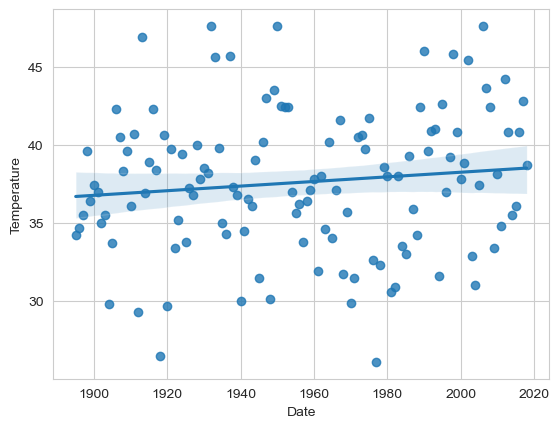

In [517]:
axes = sns.regplot (x=nyc.Date, y=nyc.Temperature)

In [518]:
axes.set_ylim(10, 70)

(10.0, 70.0)

###

## Time Series and Simple Linear Regression (from 15.4)

### a. Loading the Average High Temperatures into a DataFrame

In [519]:
# Items 1-4 loaded previously. Running Item #5 to verify nyc.head() data

In [520]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### b. Splitting the Data for Training and Testing

In [521]:
from sklearn.model_selection import train_test_split

In [522]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)

In [523]:
X_train.shape

(93, 1)

In [524]:
X_test.shape

(31, 1)

### c. Training the Model

In [525]:
from sklearn.linear_model import LinearRegression

In [526]:
linear_regression = LinearRegression()

In [527]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [528]:
linear_regression.coef_

array([0.01939167])

In [529]:
linear_regression.intercept_

-0.30779820252658396

### d. Testing the Model

In [530]:
predicted = linear_regression.predict(X_test)

In [531]:
expected = y_test

In [532]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### e. Predicting Future Temperatures and Estimating Past Temperatures

In [533]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [534]:
predict(2019)

array([38.84399018])

In [535]:
predict(1890)

array([36.34246432])

In [536]:
predict(2026)

array([38.97973189])

### f. Visualizing the Dataset with the Regression Line

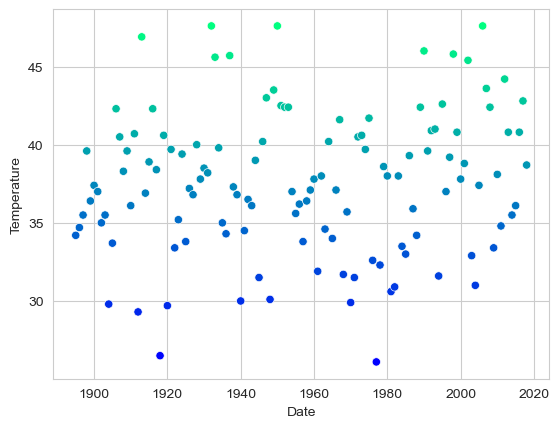

In [537]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

In [538]:
axes.set_ylim(10, 70)

(10.0, 70.0)

In [539]:
import numpy as np

In [540]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [541]:
y = predict(x)

In [542]:
import matplotlib.pyplot as plt 

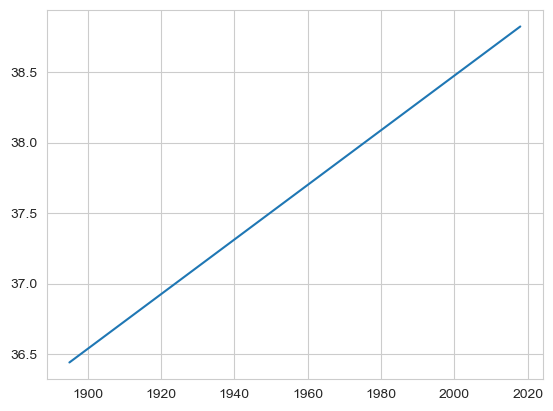

In [543]:
line = plt.plot(x, y)